# 521153S Deep Learning assignment 3: Training CNN networks



This assignment is designed by Marko Savic.

## Outline 
#### In this assignment, you will learn:
* Writing custom dataset in Pytorch with training, validation and testing data.
* Building a Convolutional Neural Network (CNN) in Pytorch.
* Training and testing your CNN in Pytorch.

#### Tasks (<span style="color:green">10 points</span>)
* **Part 1.** Writing a custom dataset based on Fashion-MNIST (<span style="color:green">4 points</span>)
    * 1.1. Define a Dataset class (<span style="color:green">2 points</span>)
    * 1.2. Dataset checking (<span style="color:green">1 points</span>)
    * 1.3. Iterating through the dataset with batches (<span style="color:green">1 points</span>)<br>
* **Part 2.** Build a CNN on your own. (<span style="color:green">2 points</span>) <br>
* **Part 3.** Train and test your CNN. (<span style="color:green">4 points or more</span>)
    * 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>) <br>
    * 3.2. Train and test your network (<span style="color:green">1.5 point</span>) <br>

#### Environment
Python 3, Numpy, matplotlib, torch, torchvision

#### Dataset
* [**Fashion-MNIST**](https://github.com/zalandoresearch/fashion-mnist)
is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

You are to split the 60,000 images in the predefined training set into a new training set with 50,000 images and a validation set with 10,000 images. Fashion-MNIST is a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training, validation and testing splits. 

#### Hints
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the codes from other parts.
* Be careful with the shapes of the tensors flowing through the CNN model, making all the operations have compatible inputs and outputs. 

## Part 1. Writing a custom dataset based on Fashion-MNIST (<span style="color:green">4 points</span>)

### Part 1.1. Define a Dataset class (<span style="color:green">2 points</span>)
Here we define a custom dataset by extending the [Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) class. 

In [1]:
!pip install onedrivedownloader

In [2]:
from onedrivedownloader import download
import os
link = 'https://unioulu-my.sharepoint.com/:u:/g/personal/msavic21_univ_yo_oulu_fi/EY1hdgh6AvZKvqYn3WFp5XMB1EDaL0IYST9PIPdBB8f0Eg?e=NSxK4b'

if not os.path.exists('./data/fashion_mnist_npy'):
    print('Downloading dataset')
    download(link, filename="./fashion_mnist_npy_hw3", unzip=True, unzip_path='./data/fashion_mnist_npy')

100%|████████████████████████████████████████████████████████████████████████████| 30.6M/30.6M [00:03<00:00, 9.29MiB/s]


Unzipping file...


Extracting files: 100%|██████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 10.71it/s]


In [23]:
# import necessary packages
import os 
import torch 
import requests, zipfile, sys
import numpy as np
import matplotlib.pyplot as plt 
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms


# fashion_MNIST dataset 
data_dir='./data/fashion_mnist_npy/'
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
train_label = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_label = np.load(os.path.join(data_dir, 'test_labels.npy'))

print(len(train_label))
# split the training data to a new training data and validation data

class_indices = [[] for i in range(10)]
for i, v in enumerate(train_label):
    class_indices[v].append(i)

indices_all = np.random.permutation(len(class_indices[0]))
# take the first 1000 indices of indices_all
indices = indices_all[:1000]
# take the rest of the indices of indices_all
indices_rest = indices_all[1000:]

valid_indices = []
train_indices = []
for i in range(10):
    # build indices for validation set
    valid_indices.extend(np.array(class_indices[i])[indices])
    # TODO: build indices for training set (0.25 points)
    # your code here 


    train_indices.extend(np.array(class_indices[i])[indices_rest])

# write the custom dataset based on the dataset
class FashionMnist(Dataset):
    """Fashion Mnist dataset""" 

    def __init__(self, phase='train', transform=None):

        # TODO: now, split the predefined training data (1 points)
        if 'train' == phase:
            # your code here
            
            self.data = train_data[train_indices]
            self.label = train_label[train_indices]

            
        elif 'valid' == phase:
            # your code here 
            
            self.data = train_data[valid_indices]
            self.label = train_label[valid_indices]

        
        elif 'test' == phase:
            # your code here
            
            self.data = test_data
            self.label = test_label

        
        else:
            assert True, 'wrong phase'
            

        self.transform = transform 
        
        self.label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        
        # TODO: get image and label according to the index (0.25 points)
        # your code here 
        
        img, label = self.data[index], self.label[index]

        # to return a PIL Image
        img = Image.fromarray(img, mode='L')

        if self.transform is not None:
            img = self.transform(img)

        return img, label


60000


### Part 1.2. Dataset checking (<span style="color:green">1.5 points</span>)
First, randomly show some images in training, validation and testing data and check if the images have correct labels.<br>
Secondly, check the number of images for each class, to make sure the dataset created correctly.

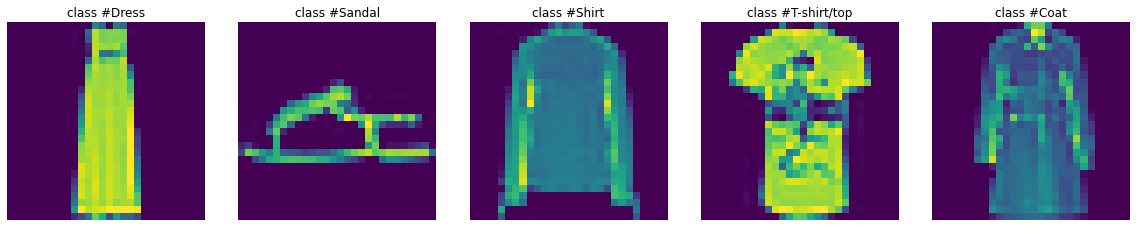

total number of training set: 50000
numer of images for class T-shirt/top: 5000
numer of images for class Trouser: 5000
numer of images for class Pullover: 5000
numer of images for class Dress: 5000
numer of images for class Coat: 5000
numer of images for class Sandal: 5000
numer of images for class Shirt: 5000
numer of images for class Sneaker: 5000
numer of images for class Bag: 5000
numer of images for class Ankle boot: 5000


In [24]:
# checking training set
# randomly show some samples and their labels
# TODO: create a FashionMnist dataset for training, set transform to None (0.5 points)
# your code here


train_set = FashionMnist()

num_to_show = 5


idx = np.random.choice(range(len(train_set)), num_to_show, replace=False) # randomly pick 5 pictures to show

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = train_set[idx[i]] 
    label_name = train_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()

# print number of images for each class
print('total number of training set: {}'.format(len(train_set)))
for i in range(10):
    print('numer of images for class {}: {}'.format(train_set.label_names[i], np.sum(train_set.label==i)))

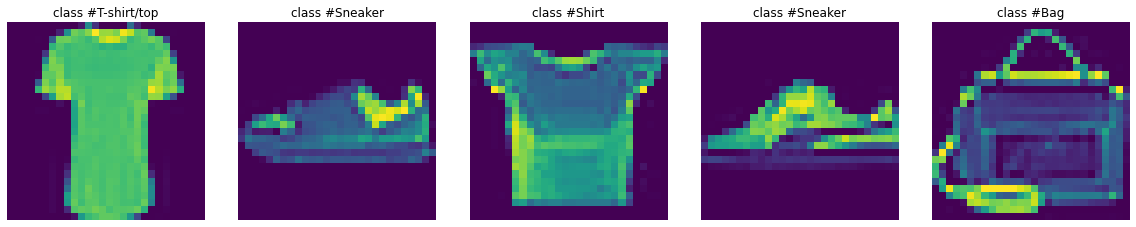

total number of valid set: 10000
numer of images for class T-shirt/top: 1000
numer of images for class Trouser: 1000
numer of images for class Pullover: 1000
numer of images for class Dress: 1000
numer of images for class Coat: 1000
numer of images for class Sandal: 1000
numer of images for class Shirt: 1000
numer of images for class Sneaker: 1000
numer of images for class Bag: 1000
numer of images for class Ankle boot: 1000


In [31]:
# TODO:checking validation data (0.5 points)
# your code here, like the training set, the output in this section should be like this (you can have your own visualization style)


valid_set = FashionMnist(phase='valid')


num_to_show = 5


idx = np.random.choice(range(len(valid_set)), num_to_show, replace=False)

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = valid_set[idx[i]]
    label_name = valid_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()


print('total number of valid set: {}'.format(len(valid_set)))
for i in range(10):
    print('numer of images for class {}: {}'.format(valid_set.label_names[i], np.sum(valid_set.label==i)))

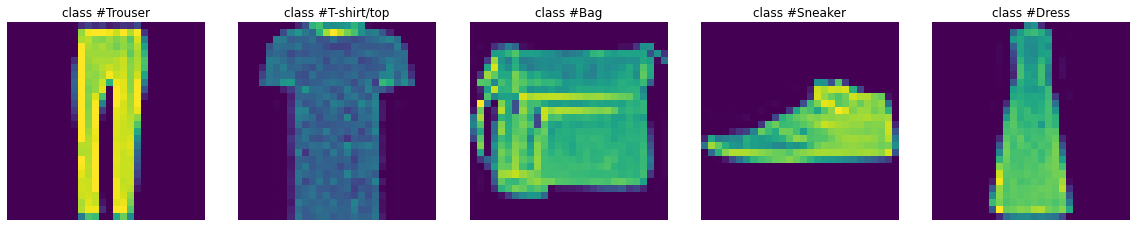

total number of testing set: 10000
numer of images for class T-shirt/top: 1000
numer of images for class Trouser: 1000
numer of images for class Pullover: 1000
numer of images for class Dress: 1000
numer of images for class Coat: 1000
numer of images for class Sandal: 1000
numer of images for class Shirt: 1000
numer of images for class Sneaker: 1000
numer of images for class Bag: 1000
numer of images for class Ankle boot: 1000


In [36]:
# TODO: checking testing data (0.5 points)
# your code here


test_set = FashionMnist(phase='test')



num_to_show = 5

idx = np.random.choice(range(len(test_set)), num_to_show, replace=False)

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = test_set[idx[i]]
    label_name = test_set.label_names[label]

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))
    ax.axis('off')
    plt.imshow(np.asarray(image))

plt.show()


print('total number of testing set: {}'.format(len(test_set)))
for i in range(10):
    print('numer of images for class {}: {}'.format(test_set.label_names[i], np.sum(test_set.label==i)))


### Part 1.3. Iterating through the dataset with batches (<span style="color:green">1 points</span>)
Here, we add more features with the help of [DataLoader](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset):
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

`torch.utils.data.DataLoader` is an iterator which provides all these features. Parameters used below should be clear. 

The `DataLoader` takes as input an instance of `FashionMnist` we defined in Part 1.1. Since images in the dataset currently are all in PIL format, we have to convert them to torch.Tensor by using a transform. Actually, `transform` is often used for data augmentation, further illustrations of `transform` can be found in [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms).

In [46]:
# Set batch_size to 64, shuffling the training set. Number of workers here is set to 0. If your system is Linux, 
# it is possible to try more workers to do multi-process parallel reading.
data_transform = transforms.Compose([transforms.ToTensor()])

train_set = FashionMnist(phase='train', transform=data_transform) 

train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)

# TODO: create test_loader and valid_loader, both with no shuffling (1 points)
# your code here 


valid_set = FashionMnist(phase='valid', transform = data_transform)

valid_loader = DataLoader(valid_set, batch_size=64, shuffle=False, num_workers=0)




test_set = FashionMnist(phase='test', transform = data_transform)

test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)

## Part 2. Build a CNN on your own (<span style="color:green">2 points</span>)
Structure of the CNN (**Conv**: convolutional layer, **BN**: Batch Normalization layer, **Max_pool**: max pooling layer, **FC**: fully connected layer, batch_size=64):
<!--![model.png](attachment:model.png)-->
<img src=https://raw.githubusercontent.com/marukosan93/DL2024_resources/refs/heads/master/CNN.png width="800">

To define your own Network, following the rule of thumb:
1. Define the layers in `__init__`.
2. Do the forward calculation in `forward`.

In [66]:
import torch
import torch.nn as nn


class Network(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # TODO: define layers (1 points)  
        # your code here
        
        
        #for channel 1
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        #for Channel 2
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        
        self.fc1 = nn.Linear(64 * 5 * 5, 128)  
        
        self.relu3 = nn.ReLU()
        
        
        self.fc2 = nn.Linear(128, num_classes)  # Output size matches the number of classes
        
        
        
    def forward(self, x):
         # TODO: forwards pass (1 points)  
        # your code here
        
        
        #layer 1
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        
        x = self.max_pool1(x)
        
        
        
        #layer 2
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        
        
        x = self.max_pool2(x)
        
        
        x = x.view(x.size(0), -1)  
        

        x = self.fc1(x)
        x = self.relu3(x)
        

        x = self.fc2(x)
        
        return x


## Part 3. Train and test your CNN model (<span style="color:green">4 points</span>)
### Part 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>)
* Instantiate a network.
* When training, create an optimizer to take care of network's parameters, calculate the loss and accuracy.
* When evaluating, only the accuracy needs to be calculated

In [91]:
# instantiate a network
net = Network(num_classes=10)

# evaluation function
def eval(net, data_loader):
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    net.eval()
    correct = 0.0
    num_images = 0.0
    for i_batch, (images, labels) in enumerate(data_loader):
        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()
        outs = net(images) 
#         _, preds = outs.max(1)
        preds = outs.argmax(dim=1)
        correct += preds.eq(labels).sum()
        num_images += len(labels)

    acc = correct / num_images
    return acc

# training function
def train(net, train_loader, valid_loader):
    loss_function = torch.nn.CrossEntropyLoss()
    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    
    # your code here
    
    
    learning_rate = 0.01
    
    optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0)

    
    

    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
        
    epoches = 10
    for epoch in range(epoches):
        net.train() 
        correct = 0.0 # used to accumulate number of correctly recognized images
        num_images = 0.0 # used to accumulate number of images
        
        total_loss = 0.0 #for accumulate loss for epochs
        
        
        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
                
            outputs = net(images)
                
            loss = loss_function(outputs, labels)
                
                
            optimizer.zero_grad()  
            loss.backward()        
            optimizer.step()  
                
                
            preds = outputs.argmax(dim=1) 
            correct += preds.eq(labels).sum().item()  
            num_images += labels.size(0)  
                
                
            total_loss += loss.item()
                
                
            # TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points), 
            # backward propagation (0.75 points) and calculating the accuracy (0.5 points)
            
        acc = correct / num_images
        acc_eval = eval(net, valid_loader)
        
        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    return net

### Part 3.2. Train and test your network (<span style="color:green">1.5 points</span>)

In [92]:
print('Please wait patiently, it may take some seconds...')
# TODO: train your network here (0.75 points)
# your code here

train(net, train_loader, valid_loader)


# TODO: test your network here on testing data (0.75 points)
# your code here

acc_test = eval(net, test_loader)

print('accuracy on testing data: %f' % acc_test) #  a reference output is provided below:


Please wait patiently, it may take some seconds...
epoch: 0, lr: 0.010000, accuracy: 0.839240, loss: 0.508802, valid accuracy: 0.858900
epoch: 1, lr: 0.010000, accuracy: 0.890820, loss: 0.145632, valid accuracy: 0.882800
epoch: 2, lr: 0.010000, accuracy: 0.904300, loss: 0.013781, valid accuracy: 0.894300
epoch: 3, lr: 0.010000, accuracy: 0.913140, loss: 0.270596, valid accuracy: 0.893600
epoch: 4, lr: 0.010000, accuracy: 0.922160, loss: 0.354069, valid accuracy: 0.903900
epoch: 5, lr: 0.010000, accuracy: 0.931380, loss: 0.731299, valid accuracy: 0.902500
epoch: 6, lr: 0.010000, accuracy: 0.936460, loss: 0.143904, valid accuracy: 0.884500
epoch: 7, lr: 0.010000, accuracy: 0.941280, loss: 0.101624, valid accuracy: 0.913500
epoch: 8, lr: 0.010000, accuracy: 0.947200, loss: 0.019401, valid accuracy: 0.907200
epoch: 9, lr: 0.010000, accuracy: 0.951780, loss: 0.232480, valid accuracy: 0.907800
accuracy on testing data: 0.909100
